# Package Installation
```python3
# conda update --all 
# conda create -n control-env-3-10 pytest numpy scipy control matplotlib ipykernel slycot pandas python=3.10
```

/home/pichim/miniforge3/envs/control-env-3-10/lib/python3.10/site-packages/scipy/signal/_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


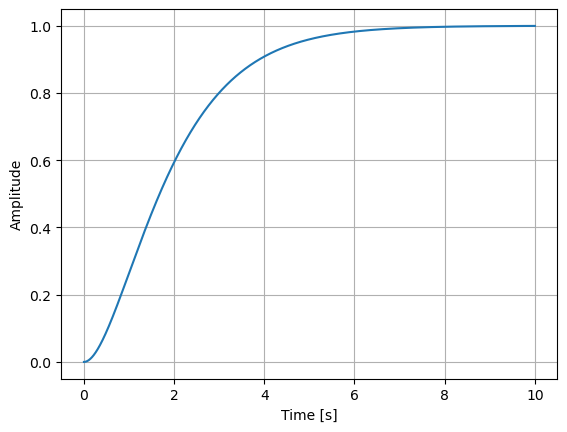

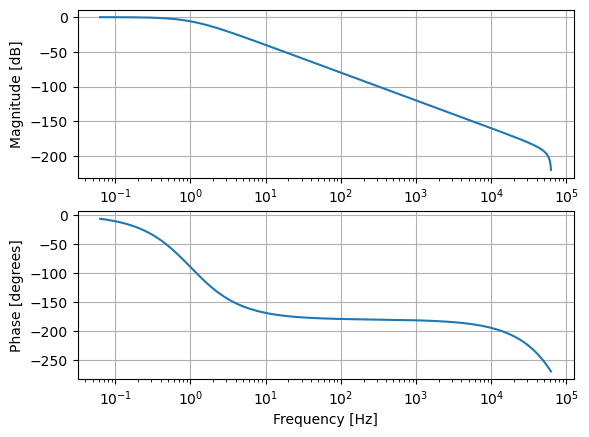

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ctrl

# Define the continuous-time transfer function H(s) = 1 / (s^2 + 2s + 1)
num = [1]  # Numerator coefficients
den = [1, 2, 1]  # Denominator coefficients

# Create the continuous-time transfer function
G = ctrl.TransferFunction(num, den)

# Define the sampling time
Ts = 50e-6

# Discretize the system
Gd = ctrl.cont2discrete((num, den), Ts)

# Define the simulation duration
T_sim = 10.0

# Generate the time vector
t = np.arange(0, T_sim, Ts)

# Simulate the step response using dlsim
_, y = ctrl.dstep(Gd, t=t)
y = np.squeeze(y)

# Plot the step response of the discrete system
plt.figure()
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

# Generate the Bode plot data for the discrete system
w = 2.0 * np.pi * np.logspace(-2, np.log10(0.99 / (2.0*Ts)), 1000) * Ts
w, mag, phase = ctrl.dbode(Gd, w)

# Plot the magnitude
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(w, mag)
plt.grid(True)
plt.ylabel('Magnitude [dB]')
plt.subplot(2, 1, 2)
plt.semilogx(w, phase)  # Bode phase plot
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.show()

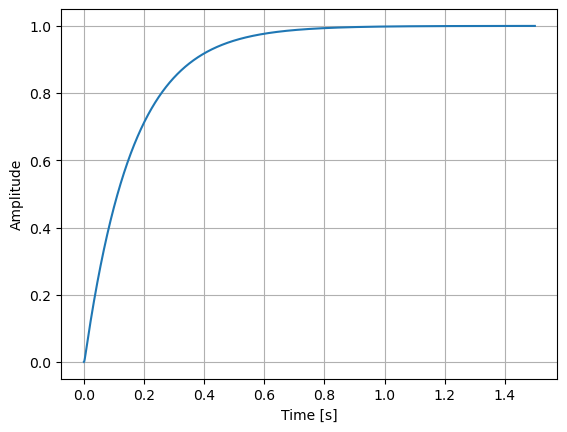

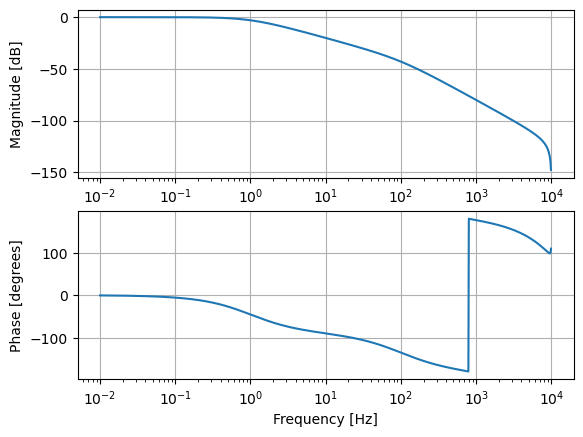

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the continuous-time transfer function H(s) = 1 / (s^2 + 2s + 1)
num = [1]  # Numerator coefficients
den = [0.5, 1]  # Denominator coefficients

# Create the continuous-time transfer function
sys1 = ctrl.tf2ss( ctrl.TransferFunction(1, [1/(2*np.pi*1), 1]) )
sys2 = ctrl.tf2ss( ctrl.TransferFunction(1, [1/(2*np.pi*100), 1]) )
sys = sys1 * sys2

# Define the sampling time
Ts = 50e-6

# Discretize the system
sysd = ctrl.sample_system(sys, Ts, method='zoh')

# Define the simulation duration
T_sim = 1.5

# Generate the time vector
t = np.arange(0, T_sim, Ts)

# Get the step response of the discrete system
_, y = ctrl.step_response(sysd, t)

# Plot the step response of the discrete system
plt.figure()
plt.plot(t, y)
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

freq = np.logspace(-2, np.log10(0.99 / (2.0*Ts)), 1000)
mag, phase, _ = sysd.frequency_response(2.0 * np.pi * freq)

plt.figure()
plt.subplot(2, 1, 1)
plt.semilogx(freq, 20 * np.log10(mag))
plt.grid(True)
plt.ylabel('Magnitude [dB]')
plt.subplot(2, 1, 2)
plt.semilogx(freq, phase * (180.0 / np.pi))
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [degrees]')
plt.show()
